# Práctica 8: Máquinas de Vectores de Soporte.

## Realizado por:
- Susana Suárez Mendoza
- Mara Pareja del Pino

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, model_selection, metrics
import matplotlib.pyplot as plt

### Ejercicio 1. Máquina de vectores soporte lineal.

1. Obtener el conjunto de datos datos_svm.csv descrito en el apartado 8.2.1.

In [2]:
data_csv= pd.read_csv('./datos/datos_svm.csv', sep = ',')
df = data_csv.to_numpy()
data_x = df[:, :-1]
data_y = df[:, -1]

2. Obtener un clasificador SVM lineal para cada uno de los siguientes valores de C, {0.01, 1, 10}, con todas las muestras del conjunto de datos.

In [3]:
c = [0.1, 1, 10]
clfs = []

for i in c:
    clf = svm.SVC(kernel='linear', C=i)
    clf.fit(data_x, data_y)
    clfs.append(clf)
    


3. Para cada uno de los tres clasificadores anteriores de debe mostrar gráficamente (un gráfico por clasificador): las muestras utilizadas para entrenar, las superficies de decisión y los vectores soporte como cruces rojas.

In [4]:
def decision_surface(clf, x):
    w = clf.coef_
    b = clf.intercept_
    x21 = -(w[0,0]/w[0,1])*x -b[0]/w[0,1]
    x22 = -(w[1,0]/w[1,1])*x -b[1]/w[1,1]
    x23 = -(w[2,0]/w[2,1])*x -b[2]/w[2,1]
    return x21, x22, x23

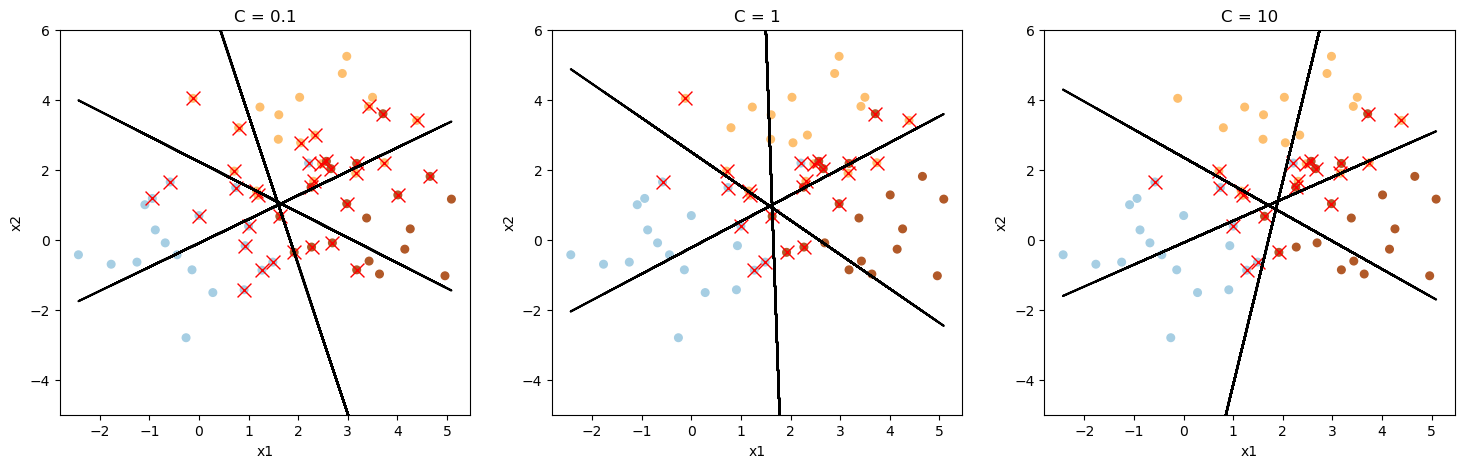

In [5]:
ax, fig = plt.subplots(1, 3, figsize=(18, 5))
for i in range(len(clfs)):
    fig[i].scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap=plt.cm.Paired)

    fig[i].scatter(clfs[i].support_vectors_[:, 0], clfs[i].support_vectors_[:, 1], s=100,
                     linewidth=1, marker='x', c='r')
    
    
    fig[i].set_title('C = ' + str(c[i]))
    fig[i].set_xlabel('x1')
    fig[i].set_ylabel('x2')

    x21, x22, x23 = decision_surface(clfs[i], data_x[:, 0])
    fig[i].plot(data_x[:, 0], x21, 'k-')
    fig[i].plot(data_x[:, 0], x22, 'k-')
    fig[i].plot(data_x[:, 0], x23, 'k-')

    fig[i].set_ylim(-5, 6)

plt.show()


4. Analizar los resultados obtenidos dando una explicación de los mismos.

El parámetro C es un hiperparámetro en SVM (Support Vector Machines) que controla la penalización por violar la regla de decisión. Cuando se aumenta el valor de C, se reduce el margen y se permite que se cometan más errores en la clasificación de los datos de entrenamiento. Esto significa que el modelo es más propenso a sobreajustarse a los datos de entrenamiento.

Al aumentar el valor de C, se hace más estricto el criterio de selección de los vectores soporte. Esto se debe a que un valor más alto de C implica una penalización más alta por los errores de clasificación y, por lo tanto, el algoritmo de SVM trata de encontrar un modelo que tenga menos errores de clasificación. A medida que se hace más estricto el criterio de selección de los vectores soporte, se reduce el número de vectores soporte necesarios para construir el modelo.

En las gráficas podemos ver como al aumentar los valores de C se reduce el número de vectores soporte (cruces rojas) que se pintan más próximos a las superficies de decisión.


### Ejercicio 2: Implementar un clasificador de sexo basado en la imagen de la cara con SVM.

1. Leer el conjunto de entrenamiento y de test de los archivos CelebA-10K-train.csv y CelebA-10K-test.csv respectivamente.

In [6]:
datos_train = pd.read_csv("./datos/CelebA-10K-train.csv")
datos_test = pd.read_csv("./datos/CelebA-10K-test.csv")

2. Dividir el conjunto de entrenamiento en entrenamiento (80%) y validación (20%).

In [7]:
X_train_sub, X_val, y_train_sub, y_val = model_selection.train_test_split(datos_train.iloc[:,2:].to_numpy(), datos_train.iloc[:, 1].to_numpy(), test_size=0.2, random_state=0)

3. Entrenar clasificadores basados en SVM utilizando los kernel lineal, polinomial y función de base radial con diferentes valores para el coeficiente de regularización C.

In [8]:
kernels = ['linear', 'poly', 'rbf']
c = [0.1, 1, 10, 100, 1000]
clfs = []

for i in kernels:
    for j in c:
        clf = svm.SVC(kernel=i, C=j)
        clf.fit(X_train_sub, y_train_sub)
        clfs.append(clf)


4. Para la mejor combinación de núcleo y coeficiente de regularización, calcular la tasa de acierto en el conjunto de test.

In [9]:
best_score = 0
best_clf = None
for i in range(len(clfs)):
    score = clfs[i].score(X_val, y_val)
    if score > best_score:
        best_score = score
        best_clf = clfs[i]

print('La mejor combinación de kernel es:', best_clf.get_params()['kernel'], 'con C =', best_clf.get_params()['C'], 'con un score de: ', best_score, '.')

La mejor combinación de kernel es: rbf con C = 100 con un score de:  0.947 .


Al igual que en le ejercicio anterior, al aumentar C se penaliza más el error por lo que se acota la cercanía de los vectores soporte a la superficie de decisión. Sin embargo, es importante tener en cuenta que si se establece un valor de C demasiado alto, se corre el riesgo de sobreajustar el modelo a los datos de entrenamiento y se puede obtener un peor rendimiento en los datos de prueba o en la predicción de datos futuros. Un claro ejemplo es que a pesar de tener un valor muy alto como C = 1000, esta no es la mejor combinación obtenida debido a lo explicado anteriormente.

In [10]:
clf = svm.SVC(kernel= best_clf.get_params()['kernel'],  C= best_clf.get_params()['C'])
clf.fit(datos_train.iloc[:,2:].to_numpy(), datos_train.iloc[:, 1].to_numpy())

print('La tasa de acierto es: ', clf.score(datos_test.iloc[:,2:].to_numpy(), datos_test.iloc[:, 1].to_numpy()))

La tasa de acierto es:  0.9516


En la práctica 6 este mismo entrenmiento con el modelo de regresión logística nos dio una tasa de acierto del 0.91, mientras que con este clasificador de máquinas de soporte vectorial, la tasa de acierto aumenta hasta el 0.95, mejorando así los resultados.

5. (Opcional) Clasificar las imágenes con el clasificador con la mejor combinación de núcleo y coeficiente de regularización que están en el archivo comprimido ImagenesParaClasificar.zip que se encuentra en el github de las prácticas de la asignatura, y comparar los resultados con los obtenidos en la Práctica 6.

In [11]:
y_pred = clf.predict(datos_test.iloc[:,2:].to_numpy())
y_test = datos_test.iloc[:, 1].to_numpy()

names = datos_test.iloc[:,0]
df = pd.DataFrame({'names': names, 'y_pred': y_pred, 'y_test': y_test})
images = ['000038.jpg', '000047.jpg', '000082.jpg', '000220.jpg', '000595.jpg', '000767.jpg', '001182.jpg', '002185.jpg']
resultados = df[df['names'].isin(images)]
resultados

,names,y_pred,y_test
828,001182.jpg,male,male
1174,000595.jpg,female,female
1725,000038.jpg,male,male
2647,000767.jpg,female,female
3387,000220.jpg,male,male
3397,000082.jpg,male,male
4225,002185.jpg,female,male
4526,000047.jpg,female,female


In [12]:
print("Accuracy score: ", metrics.accuracy_score(resultados['y_test'], resultados['y_pred']))

Accuracy score:  0.875


En aquellas imágenes donde la clasificación podría ser difusa hasta para el ser humano, el clasificador estudiado ha obtenido una tasa de acierto del 87.5% a diferencia del clasificador de regresión logística utilizado en la práctia 6 con un porcentaje de acierto del 50%.

Por tanto, podemos concluir que el mejor clasificador entre los estudiados por ahora es la máquina de vectores de soporte.